# Pandemi Bikin Angka Pekerja Anak di Indonesia Naik!

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')

## EDA

### Persentase anak usia 10-17 tahun yang bekerja menurut provinsi

In [68]:
pers_anak_kerja = pd.read_excel('data/child_labor/Persentase anak usia 10-17 tahun yang bekerja menurut provinsi.xlsx')
pers_anak_kerja.head()

,Provinsi,Persentase anak usia 10-17 tahun yang bekerja menurut provinsi (Persen),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,2019.00,2020.00,2021.00,2018.00
1,ACEH,1.18,1.98,1.39,1.68
2,SUMATERA UTARA,4.01,6.39,4.83,4.29
3,SUMATERA BARAT,2.46,4.29,2.64,2.51
4,RIAU,2.21,3.37,2.87,1.92


In [69]:
pers_anak_kerja.loc[0, 'Provinsi'] = 'provinsi'
pers_anak_kerja.columns = pers_anak_kerja.iloc[0, :]
pers_anak_kerja.drop(0, axis=0, inplace=True)
pers_anak_kerja.head()

,provinsi,2019.0,2020.0,2021.0,2018.0
1,ACEH,1.18,1.98,1.39,1.68
2,SUMATERA UTARA,4.01,6.39,4.83,4.29
3,SUMATERA BARAT,2.46,4.29,2.64,2.51
4,RIAU,2.21,3.37,2.87,1.92
5,JAMBI,2.06,2.43,1.86,2.88


In [70]:
pers_anak_kerja.set_index('provinsi', inplace=True)
pers_anak_kerja.columns = pd.to_datetime(pers_anak_kerja.columns.astype(int).astype(str))
pers_anak_kerja.head()

,2019-01-01,2020-01-01,2021-01-01,2018-01-01
provinsi,,,,
ACEH,1.18,1.98,1.39,1.68
SUMATERA UTARA,4.01,6.39,4.83,4.29
SUMATERA BARAT,2.46,4.29,2.64,2.51
RIAU,2.21,3.37,2.87,1.92
JAMBI,2.06,2.43,1.86,2.88


In [71]:
pers_anak_kerja = pers_anak_kerja.T.reset_index()
pers_anak_kerja.head()

provinsi,0,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
0,2019-01-01,1.18,4.01,2.46,2.21,2.06,2.27,1.99,2.20,2.41,...,4.04,4.90,5.26,4.57,3.46,3.04,3.51,2.30,3.17,2.35
1,2020-01-01,1.98,6.39,4.29,3.37,2.43,3.41,2.98,4.01,4.81,...,5.59,6.16,8.05,5.46,5.28,3.35,3.80,5.35,3.49,3.25
2,2021-01-01,1.39,4.83,2.64,2.87,1.86,2.76,1.94,3.56,3.30,...,5.12,5.33,6.46,4.28,5.50,2.49,2.12,3.81,3.25,2.63
3,2018-01-01,1.68,4.29,2.51,1.92,2.88,2.32,2.56,2.55,4.26,...,4.67,4.63,5.32,4.56,3.70,2.14,2.42,2.19,4.20,2.61


In [72]:
pers_anak_kerja.rename(columns={0: "tahun"}, inplace=True)
pers_anak_kerja.set_index('tahun', inplace=True)
pers_anak_kerja.sort_index(inplace=True)
pers_anak_kerja.head()

provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
tahun,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.68,4.29,2.51,1.92,2.88,2.32,2.56,2.55,4.26,1.09,...,4.67,4.63,5.32,4.56,3.70,2.14,2.42,2.19,4.20,2.61
2019-01-01,1.18,4.01,2.46,2.21,2.06,2.27,1.99,2.20,2.41,0.98,...,4.04,4.90,5.26,4.57,3.46,3.04,3.51,2.30,3.17,2.35
2020-01-01,1.98,6.39,4.29,3.37,2.43,3.41,2.98,4.01,4.81,1.19,...,5.59,6.16,8.05,5.46,5.28,3.35,3.80,5.35,3.49,3.25
2021-01-01,1.39,4.83,2.64,2.87,1.86,2.76,1.94,3.56,3.30,0.97,...,5.12,5.33,6.46,4.28,5.50,2.49,2.12,3.81,3.25,2.63


In [7]:
pers_anak_kerja.to_csv('data/child_labor_cleaned/pers_anak_kerja.csv')

In [73]:
pers_anak_kerja.columns

Index(['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
       'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG',
       'KEP. RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
       'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI', 'NUSA TENGGARA BARAT',
       'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN TENGAH',
       'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA',
       'SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI SELATAN',
       'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT', 'MALUKU',
       'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA', 'INDONESIA'],
      dtype='object', name='provinsi')

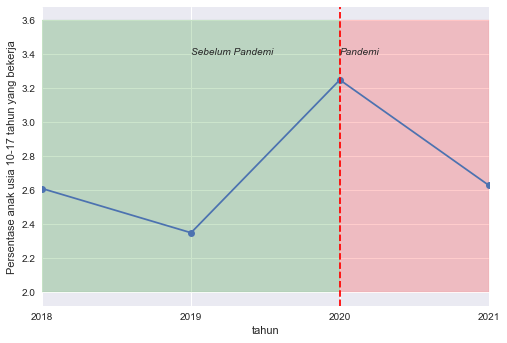

In [74]:
ax = pers_anak_kerja["INDONESIA"].plot(marker="o")
# create a seperator before and after 2020
plt.axvline(x="2020", color="red", linestyle="--")
fill_thresholds_min, fill_thresholds_max = (
    np.min(ax.get_yticks()) - 0.2,
    np.max(ax.get_yticks()) + 0.2,
)
ax.fill_between(
    pers_anak_kerja.index[:3],
    fill_thresholds_min,
    fill_thresholds_max,
    color="green",
    alpha=0.2,
)
ax.fill_between(
    pers_anak_kerja.index[2:],
    fill_thresholds_min,
    fill_thresholds_max,
    color="red",
    alpha=0.2,
)
ax.text("2020", fill_thresholds_max - 0.2, "Pandemi", style="italic")
ax.text("2019", fill_thresholds_max - 0.2, "Sebelum Pandemi", style="italic")
plt.ylabel("Persentase anak usia 10-17 tahun yang bekerja")
plt.show()


**Obersetvations:**
- Pandemi COVID-19 pada tahun 2020 menyebabkan peningkatan drastis angka pekerja anak di Indonesia

In [10]:
pers_anak_kerja_gender = pd.read_excel('data/child_labor/Persentase anak usia 10-17 tahun yang bekerja menurut jenis kelamin.xlsx')
pers_anak_kerja_gender.head()

,Jenis Kelamin + Jumlah,Persentase anak usia 10-17 tahun yang bekerja menurut jenis kelamin (Persen),Unnamed: 2,Unnamed: 3
0,NaN,2019.00,2020.00,2021.00
1,Laki-laki,2.73,3.34,2.67
2,Perempuan,1.96,3.16,2.60
3,Laki-laki + Perempuan,2.35,3.25,2.63
4,NaN,NaN,NaN,NaN


In [11]:
pers_anak_kerja_gender.loc[0, 'Jenis Kelamin + Jumlah'] = 'gender'
pers_anak_kerja_gender.columns = pers_anak_kerja_gender.iloc[0, :]
pers_anak_kerja_gender.drop(0, axis=0, inplace=True)
pers_anak_kerja_gender.drop(pers_anak_kerja_gender.iloc[3:, :].index, axis=0, inplace=True)
pers_anak_kerja_gender.head()

,gender,2019.0,2020.0,2021.0
1,Laki-laki,2.73,3.34,2.67
2,Perempuan,1.96,3.16,2.60
3,Laki-laki + Perempuan,2.35,3.25,2.63


In [12]:
pers_anak_kerja_gender.set_index('gender', inplace=True)
pers_anak_kerja_gender.columns = pd.to_datetime(pers_anak_kerja_gender.columns.astype(int).astype(str)).to_period('Y')
pers_anak_kerja_gender.head()

,2019,2020,2021
gender,,,
Laki-laki,2.73,3.34,2.67
Perempuan,1.96,3.16,2.60
Laki-laki + Perempuan,2.35,3.25,2.63


In [13]:
pers_anak_kerja_gender = pers_anak_kerja_gender.T.reset_index()
pers_anak_kerja_gender.rename(columns={0: "tahun"}, inplace=True)
pers_anak_kerja_gender.set_index('tahun', inplace=True)
pers_anak_kerja_gender.sort_index(inplace=True)
pers_anak_kerja_gender.head()

gender,Laki-laki,Perempuan,Laki-laki + Perempuan
tahun,,,
2019,2.73,1.96,2.35
2020,3.34,3.16,3.25
2021,2.67,2.60,2.63


In [14]:
pers_anak_kerja_gender.to_csv("data/child_labor_cleaned/pers_anak_kerja_gender.csv")

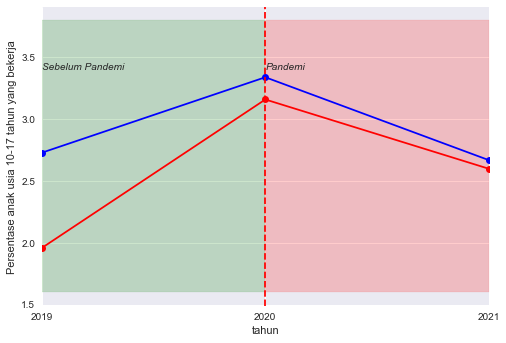

In [15]:
ax = pers_anak_kerja_gender["Laki-laki"].plot(marker="o", color="b")
ax = pers_anak_kerja_gender["Perempuan"].plot(marker="o", color="r")
# create a seperator before and after 2020
plt.axvline(x="2020", color="red", linestyle="--")
fill_thresholds_min, fill_thresholds_max = (
    np.min(ax.get_yticks()) - 0.2,
    np.max(ax.get_yticks()) + 0.2,
)
ax.fill_between(
    pers_anak_kerja.index[:3],
    fill_thresholds_min,
    fill_thresholds_max,
    color="green",
    alpha=0.2,
)
ax.fill_between(
    pers_anak_kerja.index[2:],
    fill_thresholds_min,
    fill_thresholds_max,
    color="red",
    alpha=0.2,
)
# create text top left
ax.text("2020", 3.4, "Pandemi", style="italic")
ax.text("2019", 3.4, "Sebelum Pandemi", style="italic")
plt.ylabel("Persentase anak usia 10-17 tahun yang bekerja")
plt.show()


**Observations:**
- Anak Laki-laki lebih banyak yang menjadi Pekerja Anak daripada Perempuan

In [16]:
pers_anak_kerja_rank = pers_anak_kerja.loc['2021', :].sort_values(ascending=False).reset_index()
pers_anak_kerja_rank.columns = ['provinsi', 'persentase']
pers_anak_kerja_rank.head()

,provinsi,persentase
0,SULAWESI TENGGARA,6.46
1,KALIMANTAN UTARA,5.66
2,SULAWESI BARAT,5.50
3,SULAWESI SELATAN,5.33
4,SULAWESI TENGAH,5.12


In [17]:
pers_anak_kerja_rank.to_csv('data/child_labor_cleaned/pers_anak_kerja_rank.csv', index=False)

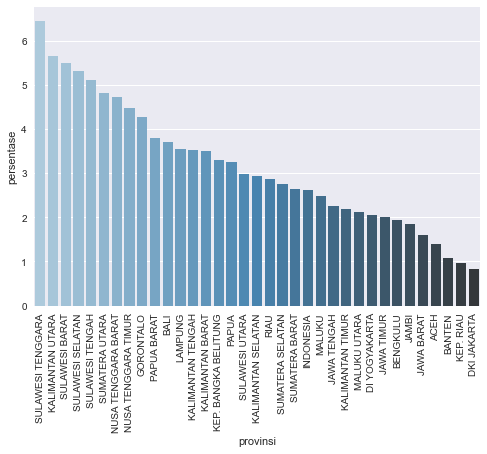

In [18]:
sns.barplot(x='provinsi', y='persentase', data=pers_anak_kerja_rank, palette='Blues_d')
plt.xticks(rotation=90)
plt.show()

### Angka Pekerja Anak pada 2020

In [19]:
angka_pekerja_anak_2020 = pd.read_excel('data/child_labor/angka-pekerja-anak-di-indonesia-meningkat-pada-2020.xlsx')
angka_pekerja_anak_2020.head()

,nama_alias,10-12 tahun,13-14 tahun,15-17 tahun
0,2019,1.83,2.07,3.08
1,2020,3.60,3.34,2.85


In [20]:
angka_pekerja_anak_2020.rename(columns={'nama_alias': 'tahun'}, inplace=True)
angka_pekerja_anak_2020.set_index('tahun', inplace=True)
angka_pekerja_anak_2020.head()

,10-12 tahun,13-14 tahun,15-17 tahun
tahun,,,
2019,1.83,2.07,3.08
2020,3.60,3.34,2.85


In [21]:
angka_pekerja_anak_2020.to_csv('data/child_labor_cleaned/angka_pekerja_anak_2020.csv')

In [22]:
# angka_pekerja_anak_2020.reset_index(inplace=True)
# angka_pekerja_anak_2020.head()

In [23]:
# pd.melt(
#     angka_pekerja_anak_2020,
#     id_vars=["tahun"],
#     value_vars=["10-12 tahun", "13-14 tahun", "15-17 tahun"],
#     var_name="provinsi",
#     value_name="persentase_kenaikan",
# )

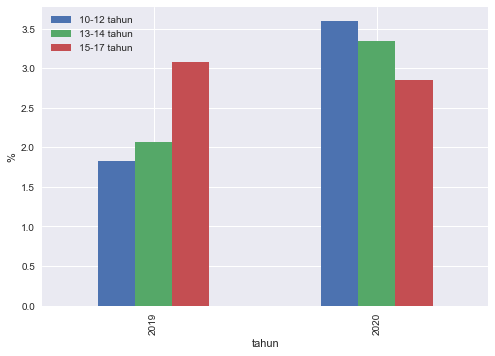

In [24]:
angka_pekerja_anak_2020.plot(kind='bar')
plt.ylabel('%')
plt.show()

**Observations:**
- Pada 2020 terdapan peningkatan dari hampir semua kalangan umur anak.
- Kenaikan paling drastis terjadi pada kalangan anak berumur 10-12 tahun (naik 96.7% dari 2019)

### Pekerja Anak Putus Sekolah

In [25]:
pekerja_anak_sekolah = pd.read_excel('data/child_labor/pekerja-anak-sekolah.xlsx')
pekerja_anak_sekolah.head()

,nama_alias,tidak/blm pernah sekolah,masih bersekolah,tidak bersekolah lagi
0,2020,5.91,2.40,15.83
1,2021,2.82,2.04,15.03


In [26]:
pekerja_anak_sekolah.rename(columns={'nama_alias': 'tahun'}, inplace=True)
pekerja_anak_sekolah.set_index('tahun', inplace=True)
pekerja_anak_sekolah.head()

,tidak/blm pernah sekolah,masih bersekolah,tidak bersekolah lagi
tahun,,,
2020,5.91,2.40,15.83
2021,2.82,2.04,15.03


In [27]:
pekerja_anak_sekolah.to_csv('data/child_labor_cleaned/pekerja_anak_sekolah.csv')

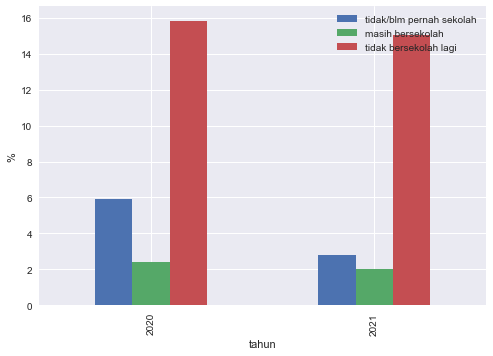

In [28]:
pekerja_anak_sekolah.plot(kind='bar')
plt.ylabel('%')
plt.show()

**Observations:**
- Pekerja anak didominasi oleh anak-anak yang putus sekolah dengan 15.83% pada 2020 dan 15.03% pada 2021

### Angka Putus Sekolah

In [29]:
aps = pd.read_excel('data/child_labor/jumlah-anak-putus-sekolah-di-indonesia.xlsx')
aps.head()

,date,SD,SMP,SMK,SMA
0,2016-12-31,39213,38702,72744,36419
1,2017-12-31,32127,51190,73388,31123
2,2018-12-31,33268,28651,25357,15953
3,2019-12-31,59443,38464,32395,26864
4,2020-12-31,44516,11378,13951,13879


In [30]:
aps['date'] = pd.to_datetime(aps['date'])
aps.set_index('date', inplace=True)
aps.head()

,SD,SMP,SMK,SMA
date,,,,
2016-12-31,39213,38702,72744,36419
2017-12-31,32127,51190,73388,31123
2018-12-31,33268,28651,25357,15953
2019-12-31,59443,38464,32395,26864
2020-12-31,44516,11378,13951,13879


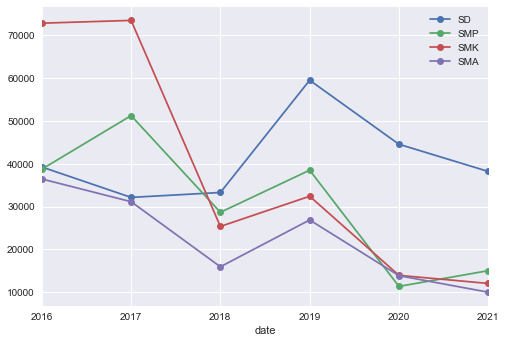

In [31]:
aps.plot(marker="o")
plt.show()

### Angka Putus Sekolah murid SD per Provinsi (not used)

In [32]:
aps_sd_provinsi = pd.read_excel('data/child_labor/angka-putus-sekolah-murid-sd-per-provinsi.xlsx')
aps_sd_provinsi.head()

,nama_data,value
0,DKI Jakarta,0.69
1,Kalimantan Utara,0.42
2,Gorontalo,0.31
3,Papua Barat,0.30
4,Sulawesi Selatan,0.28


In [33]:
aps_sd_provinsi.columns = ['provinsi', 'angka_putus_sekolah']
aps_sd_provinsi.head()

,provinsi,angka_putus_sekolah
0,DKI Jakarta,0.69
1,Kalimantan Utara,0.42
2,Gorontalo,0.31
3,Papua Barat,0.30
4,Sulawesi Selatan,0.28


In [34]:
aps_sd_provinsi['provinsi'] = aps_sd_provinsi.provinsi.str.upper()
aps_sd_provinsi.loc[aps_sd_provinsi['provinsi'] == 'KEPULAUAN RIAU', 'provinsi'] = 'KEP. RIAU'
aps_sd_provinsi.head()

,provinsi,angka_putus_sekolah
0,DKI JAKARTA,0.69
1,KALIMANTAN UTARA,0.42
2,GORONTALO,0.31
3,PAPUA BARAT,0.30
4,SULAWESI SELATAN,0.28


In [35]:
aps_sd_provinsi_x_anak_kerja = pd.merge(aps_sd_provinsi, pers_anak_kerja.T.copy()['2020'], on='provinsi', how='left')
aps_sd_provinsi_x_anak_kerja

,provinsi,angka_putus_sekolah,2020
0,DKI JAKARTA,0.69,1.30
1,KALIMANTAN UTARA,0.42,4.84
2,GORONTALO,0.31,5.46
3,PAPUA BARAT,0.30,5.35
4,SULAWESI SELATAN,0.28,6.16
5,MALUKU UTARA,0.28,3.80
6,PAPUA,0.28,3.49
7,MALUKU,0.24,3.35
8,KEP. RIAU,0.23,1.19
9,SULAWESI TENGGARA,0.21,8.05


In [36]:
pers_anak_kerja['DKI JAKARTA']

tahun
2018    1.48
2019    1.17
2020    1.30
2021    0.82
Freq: A-DEC, Name: DKI JAKARTA, dtype: float64

## Kekerasan Anak

In [46]:
kekerasan_anak = pd.read_excel('data/child_labor/kekerasan_anak.xlsx')
kekerasan_anak.head()

,KASUS PERLINDUNGAN ANAK,2016,2017,2018,2019,2020
0,Sosial dan Anak Dalam Situasi Darurat,236,286,302,291,128
1,Anak Terlantar (Anak Penyandang Masalah Keseja...,90,144,152,159,71
2,Balita Terlantar (Korban),21,37,35,29,8
3,Anak Terlantar (Korban),26,30,28,33,12
4,Anak Mengemis (Korban),13,16,17,16,6


In [47]:
kekerasan_anak = kekerasan_anak.T
kekerasan_anak['total'] = kekerasan_anak.sum(axis=1)
kekerasan_anak_per_tahun = kekerasan_anak[['total']]
kekerasan_anak_per_tahun.head()

,total
KASUS PERLINDUNGAN ANAK,Sosial dan Anak Dalam Situasi DaruratAnak Terl...
2016,9255
2017,9243
2018,9846
2019,8829


In [49]:
kekerasan_anak_per_tahun.drop('KASUS PERLINDUNGAN ANAK', axis=0, inplace=True)
kekerasan_anak_per_tahun.index.name = 'tahun'
kekerasan_anak_per_tahun.head()

C:\Users\edutjie\AppData\Local\Temp\ipykernel_26424\3756089474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kekerasan_anak_per_tahun.drop('KASUS PERLINDUNGAN ANAK', axis=0, inplace=True)


,total
tahun,
2016,9255
2017,9243
2018,9846
2019,8829
2020,12098


In [51]:
kekerasan_anak_per_tahun.index = pd.to_datetime(
        kekerasan_anak_per_tahun.index.astype(str)
    )

In [40]:
kekerasan_anak_per_tahun.to_csv('data/child_labor_cleaned/kekerasan_anak_per_tahun.csv')

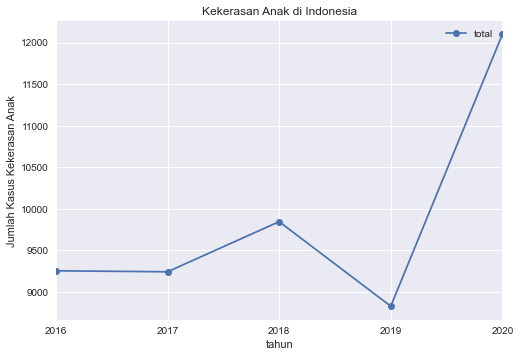

In [52]:
kekerasan_anak_per_tahun.plot(marker="o")
plt.title('Kekerasan Anak di Indonesia')
plt.ylabel('Jumlah Kasus Kekerasan Anak')
plt.show()